In [ ]:
from zipfile import ZipFile

# Path to your zip file
zip_path = '/content/russian-car-plates-prices-prediction.zip'

# Extract all contents
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')

In [ ]:
import pandas as pd


train = pd.read_csv('/content/extracted_files/train.csv')
test = pd.read_csv('/content/extracted_files/test.csv')

In [ ]:
train.head()

,id,plate,date,price
0,1,X059CP797,2024-12-26 00:00:00,65000
1,2,Y800MH790,2024-07-12 21:31:37,100000
2,3,A212TX77,2024-04-18 00:00:00,290000
3,4,P001AY199,2025-01-03 00:27:15,680000
4,5,P001AY199,2025-01-10 09:32:41,750000


In [ ]:
duplicate_count = train['plate'].duplicated().sum()
print(f"Toatal dupicate plates: {duplicate_count}")

Toatal dupicate plates: 8030


In [ ]:
top_duplicates = train['plate'].value_counts().head(10)
print("Top 10 Duplicate Plates:")
print(top_duplicates[top_duplicates > 1])

Top 10 Duplicate Plates:
plate
A949MP190    119
X582XX190     82
B777OC90      72
P606PP190     55
E750OX750     51
O595OO150     45
E555EE90      43
B333XP750     40
H001BB150     36
T777OB90      36
Name: count, dtype: int64


In [ ]:
train = train.drop_duplicates(subset=['plate'], keep='first')

In [ ]:
duplicate_count = train['plate'].duplicated().sum()
print(f"Toatal dupicate plates: {duplicate_count}")

Toatal dupicate plates: 0


In [ ]:
test.head()

,id,plate,date,price
0,51636,P700TT790,2025-01-27 00:00:00,NaN
1,51637,M081TX797,2025-02-10 00:00:00,NaN
2,51638,T333HX777,2025-02-11 00:00:00,NaN
3,51639,H744BH977,2025-02-03 00:00:00,NaN
4,51640,X066EM777,2025-02-12 00:00:00,NaN


In [ ]:
train.shape

(43605, 4)

In [ ]:
test.shape

(7695, 4)

In [ ]:
# xtrain = train.drop('price',axis = 1)
# ytrain = train['price']

In [ ]:
# xtrain.head()

In [ ]:
# ytrain.head()

# EDA Analysis

In [ ]:
train.drop(['id'],axis = 1, inplace = True)

In [ ]:
train.head()

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
5,B400BB750,2022-04-09 00:00:00,50000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43605 entries, 0 to 51634
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   plate   43605 non-null  object
 1   date    43605 non-null  object
 2   price   43605 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
train.isnull().sum()

,0
plate,0
date,0
price,0


In [ ]:
train.describe()

,price
count,4.360500e+04
mean,4.362646e+05
std,1.842495e+06
min,2.000000e+04
25%,7.000000e+04
50%,1.500000e+05
75%,3.500000e+05
max,1.000000e+08


In [ ]:
catlist = ['plate','date']
for i in catlist:
  print(i,train[i].unique())
  print(".................................")

plate ['X059CP797' 'Y800MH790' 'A212TX77' ... 'E888EB199' 'X023XK77' 'K450OC797']
.................................
date ['2024-12-26 00:00:00' '2024-07-12 21:31:37' '2024-04-18 00:00:00' ...
 '2023-02-25 15:20:47' '2022-10-16 03:36:53' '2024-04-24 11:30:07']
.................................


In [ ]:
train['date'] = pd.to_datetime(train['date'])
train.head()

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
5,B400BB750,2022-04-09 00:00:00,50000


In [ ]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train.head()

,plate,date,price,year,month,day
0,X059CP797,2024-12-26 00:00:00,65000,2024,12,26
1,Y800MH790,2024-07-12 21:31:37,100000,2024,7,12
2,A212TX77,2024-04-18 00:00:00,290000,2024,4,18
3,P001AY199,2025-01-03 00:27:15,680000,2025,1,3
5,B400BB750,2022-04-09 00:00:00,50000,2022,4,9


# Correlation

In [ ]:
corrdata = train[['year','price']]
corrdata.corr()


,year,price
year,1.000000,0.036278
price,0.036278,1.000000


In [ ]:
corrdata = train[['month','price']]
corrdata.corr()

,month,price
month,1.000000,-0.005818
price,-0.005818,1.000000


In [ ]:
corrdata = train[['day','price']]
corrdata.corr()

,day,price
day,1.000000,-0.001147
price,-0.001147,1.000000


In [ ]:
train.groupby('year')['price'].mean()

,price
year,
2021,222681.890701
2022,300572.722903
2023,353880.699074
2024,497868.185957
2025,471925.495501


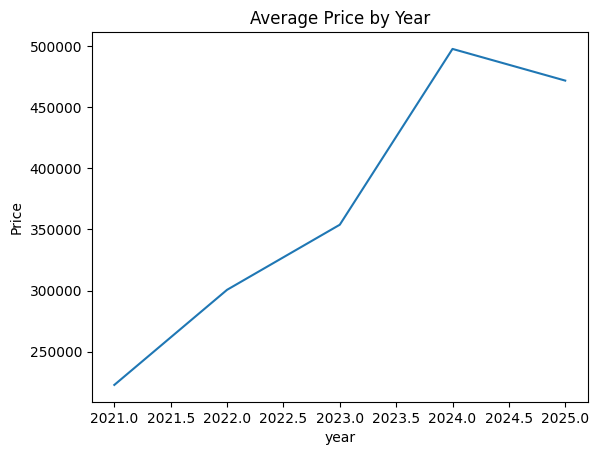

In [ ]:
# Yearly average price trend
import matplotlib.pyplot as plt
train.groupby('year')['price'].mean().plot()
plt.title("Average Price by Year")
plt.ylabel("Price")
plt.show()

In [ ]:
check = train.groupby('month')['price'].mean()
print(check)

month
1     411739.270440
2     496259.337556
3     395557.877111
4     369122.888984
5     395257.436944
6     464543.613084
7     477210.511826
8     484089.400995
9     482091.433172
10    465348.618595
11    442326.385816
12    336122.413378
Name: price, dtype: float64


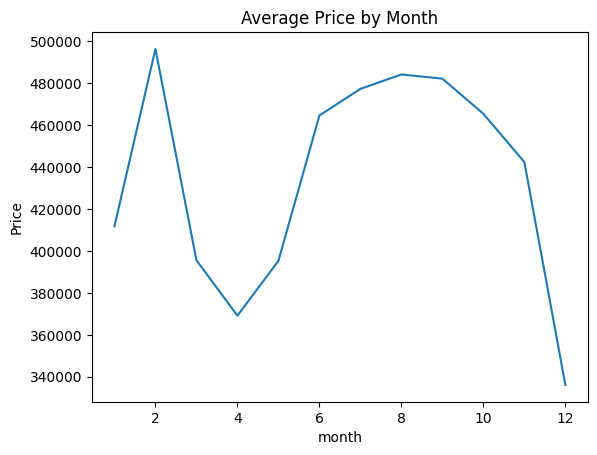

In [ ]:
train.groupby('month')['price'].mean().plot()
plt.title("Average Price by Month")
plt.ylabel("Price")
plt.show()

In [ ]:
train.groupby('day')['price'].mean().head()

,price
day,
1,449630.211292
2,482302.320225
3,371859.354388
4,481064.357729
5,479204.836898


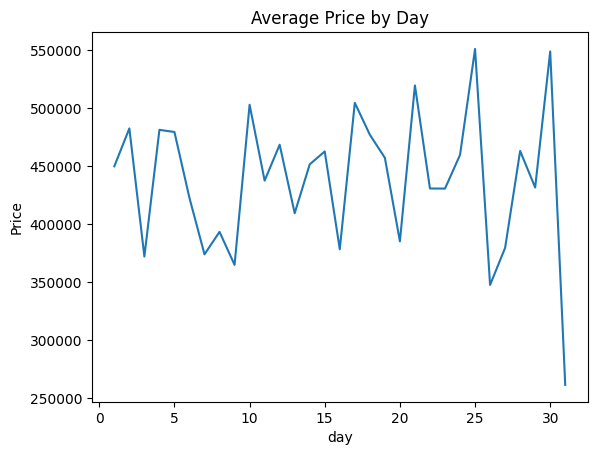

In [ ]:
train.groupby('day')['price'].mean().plot()
plt.title("Average Price by Day")
plt.ylabel("Price")
plt.show()

In [ ]:
train.head()

,plate,date,price,year,month,day
0,X059CP797,2024-12-26 00:00:00,65000,2024,12,26
1,Y800MH790,2024-07-12 21:31:37,100000,2024,7,12
2,A212TX77,2024-04-18 00:00:00,290000,2024,4,18
3,P001AY199,2025-01-03 00:27:15,680000,2025,1,3
5,B400BB750,2022-04-09 00:00:00,50000,2022,4,9


In [ ]:
train['plate_series'] = train['plate'].str[0]
train['plate_number'] = train['plate'].str[1:4]
train['region_code'] = train['plate'].str[4:6]
train['regional_code'] = train['plate'].str[6:9]

In [ ]:
train.head()

,plate,date,price,year,month,day,plate_series,plate_number,region_code,regional_code
0,X059CP797,2024-12-26 00:00:00,65000,2024,12,26,X,059,CP,797
1,Y800MH790,2024-07-12 21:31:37,100000,2024,7,12,Y,800,MH,790
2,A212TX77,2024-04-18 00:00:00,290000,2024,4,18,A,212,TX,77
3,P001AY199,2025-01-03 00:27:15,680000,2025,1,3,P,001,AY,199
5,B400BB750,2022-04-09 00:00:00,50000,2022,4,9,B,400,BB,750


In [ ]:
train.groupby('plate_series')['price'].mean()

,price
plate_series,
A,683160.520952
B,454730.718069
C,424488.489605
E,365317.780419
H,300320.223510
K,414137.869107
M,502686.413980
O,487886.378765
P,329077.269785


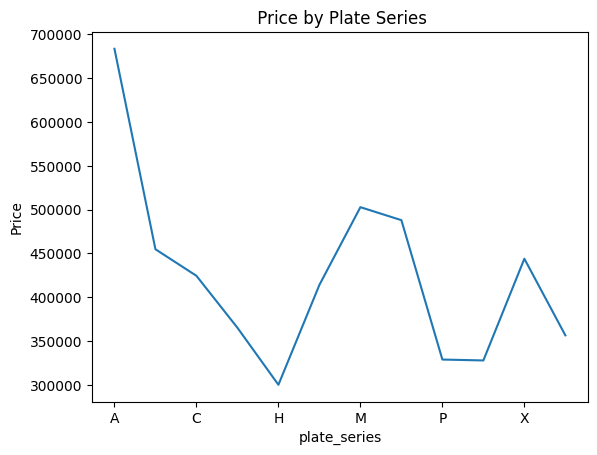

In [ ]:
train.groupby('plate_series')['price'].mean().plot()
plt.title(" Price by Plate Series")
plt.ylabel("Price")
plt.show()

In [ ]:
import plotly.express as px

# Calculate mean prices by plate_series
mean_prices = train.groupby('plate_series')['price'].mean().reset_index()

# Create the plot
fig = px.bar(mean_prices, x='plate_series', y='price',
             title='Price by Plate Series',
             labels={'price': 'Price', 'plate_series': 'Plate Series'})

# Show the plot
fig.show()

In [ ]:
plate_counts = train['plate_series'].value_counts().sort_index()  # A-Z क्रम में
print(plate_counts)

plate_series
A    4582
B    3852
C    3848
E    3534
H    3105
K    3606
M    4249
O    4050
P    3399
T    3095
X    3481
Y    2804
Name: count, dtype: int64


In [ ]:
train['plate_number'].value_counts()

,count
plate_number,
777,1074
999,914
001,880
888,780
555,749
...,...
278,3
684,3
269,3


In [ ]:
train.groupby('plate_number')['price'].mean()

,price
plate_number,
001,1.509661e+06
002,4.621488e+05
003,3.602350e+05
004,4.409576e+05
005,4.881044e+05
...,...
995,1.978947e+05
996,2.263448e+05
997,4.852698e+05


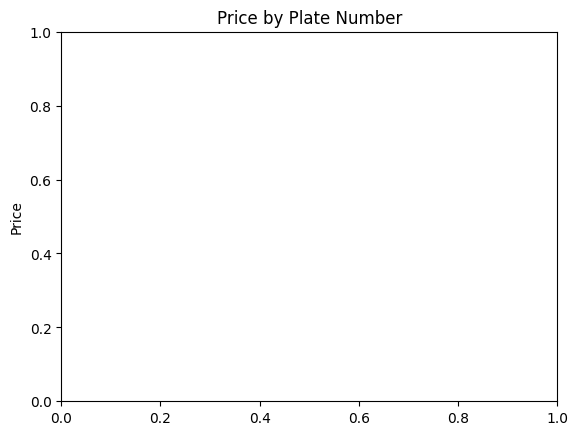

In [ ]:
train.groupby('plate_number')['price'].mean().plot
plt.title("Price by Plate Number")
plt.ylabel("Price")
plt.show()

In [ ]:
import plotly.express as px

pricebynumber = train.groupby('plate_number')['price'].mean().reset_index()
fig = px.bar(pricebynumber,x = 'plate_number',y = 'price')
fig.show()

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(pricebynumber)
print('stat= %.3f, p  =%.3f' %(stat,p))

if p>0.05:
  print("Accept ho and normally distrubuted")
else:
  print("Reject ho and not normally distributed")

stat= 0.540, p  =0.000
Reject ho and not normally distributed


In [ ]:
# removing outliers
high_price_plates = train.groupby('plate_number')['price'].mean()
high_price_plates = high_price_plates[high_price_plates > 500000].index.tolist()
print(high_price_plates)

['001', '007', '010', '014', '026', '037', '039', '053', '083', '093', '109', '110', '111', '117', '177', '179', '182', '195', '207', '215', '222', '240', '252', '256', '293', '296', '333', '339', '378', '390', '419', '423', '431', '444', '468', '476', '491', '501', '553', '555', '557', '577', '614', '620', '623', '644', '655', '666', '704', '716', '743', '744', '758', '760', '762', '774', '775', '777', '792', '804', '807', '809', '827', '840', '845', '850', '857', '859', '865', '883', '888', '895', '899', '907', '916', '922', '945', '948', '954', '963', '985', '991', '999']


In [ ]:
mean_price = train['price'].mean()
print(mean_price)

436264.5579864694


In [ ]:
train.loc[train['plate_number'].isin(high_price_plates), 'price'] = 453225.30233368836

<ipython-input-249-68b66356b138>:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '453225.30233368836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [ ]:
pricebynumber = train.groupby('plate_number')['price'].mean().reset_index()
fig = px.bar(pricebynumber,x = 'plate_number',y = 'price')
fig.show()

In [ ]:
stat, p = shapiro(pricebynumber['price'])
print('stat= %.3f, p  =%.3f' %(stat,p))

if p>0.05:
  print("Accept ho and normally distrubuted")
else:
  print("Reject ho and not normally distributed")

stat= 0.946, p  =0.000
Reject ho and not normally distributed


# regional code analysis

In [ ]:
train['region_code'].value_counts()

,count
region_code,
OO,1208
MM,930
AA,865
CC,610
OP,610
...,...
ME,178
XT,177
XA,175


In [ ]:
train.groupby('region_code')['price'].mean()

,price
region_code,
AA,875667.210245
AB,204398.662946
AC,219880.776629
AE,202694.167444
AH,261230.853944
...,...
YO,278921.461074
YP,315969.629312
YT,302289.778723


In [ ]:
nc = train.groupby('region_code')['price'].mean().reset_index()
fig = px.bar(nc, x = 'region_code', y ='price')
fig.show()

In [ ]:
# Calculate mean prices by region code
region_stats = train.groupby('region_code')['price'].agg(['mean', 'median', 'count']).reset_index()
region_stats = region_stats.sort_values('mean', ascending=False)

# Create interactive bar chart with hover data
fig = px.bar(region_stats,
             x='region_code',
             y='mean',
             hover_data=['median', 'count'],
             color='mean',
             color_continuous_scale='viridis',
             title='Detailed Price Analysis by Region Code',
             labels={'mean': 'Average Price', 'region_code': 'Region Code'})

# Add count labels above bars
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                 xaxis={'categoryorder':'total descending'},
                 hoverlabel=dict(bgcolor="white", font_size=12))

fig.show()

In [ ]:
stat , p= shapiro(nc['price'])
print('stat= %.3f, p  =%.3f' %(stat,p))

if p>0.05:
  print("Accept ho and normally distrubuted")
else:
  print("Reject ho and not normally distributed")

stat= 0.580, p  =0.000
Reject ho and not normally distributed


In [ ]:
# removing outliers
high_price_regioncode = train.groupby('region_code')['price'].mean()
high_price_regioncode = high_price_regioncode[high_price_regioncode > 400000].index.tolist()
print(high_price_regioncode)

['AA', 'CC', 'EE', 'HH', 'KK', 'KP', 'MM', 'MO', 'MP', 'OO', 'OP', 'PP', 'XX']


In [ ]:
train.loc[train['region_code'].isin(high_price_regioncode), 'price'] = 353225.30233368836

In [ ]:
ncr = train.groupby('region_code')['price'].mean().reset_index()
fig = px.bar(ncr, x = 'region_code', y ='price')
fig.show()

In [ ]:
# Calculate mean prices by region code
region_stats = train.groupby('region_code')['price'].agg(['mean', 'median', 'count']).reset_index()
region_stats = region_stats.sort_values('mean', ascending=False)

# Create interactive bar chart with hover data
fig = px.bar(region_stats,
             x='region_code',
             y='mean',
             hover_data=['median', 'count'],
             color='mean',
             color_continuous_scale='viridis',
             title='Detailed Price Analysis by Region Code',
             labels={'mean': 'Average Price', 'region_code': 'Region Code'})

# Add count labels above bars
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',
                 xaxis={'categoryorder':'total descending'},
                 hoverlabel=dict(bgcolor="white", font_size=12))

fig.show()

In [ ]:
train.groupby('regional_code')['price'].mean()

,price
regional_code,
01,278995.249931
02,299988.601077
03,405688.998781
04,293144.930236
05,372631.824169
...,...
96,306872.179223
97,385816.352598
977,167189.544741


In [ ]:
lc = train.groupby('regional_code')['price'].mean().reset_index()
fig = px.bar(lc, x = 'regional_code', y ='price')
fig.show()

In [ ]:
# Calculate comprehensive statistics
regional_stats = train.groupby('regional_code').agg({
    'price': ['mean', 'median', 'count', 'std', 'min', 'max'],
    'plate_series': pd.Series.mode
}).reset_index()

# Flatten multi-index columns
regional_stats.columns = ['_'.join(col).strip() for col in regional_stats.columns.values]

# The column is now called 'regional_code_' (with underscore) because it came from the index
print(regional_stats.columns)  # This will show the actual column names

# Create interactive bar chart - USING THE CORRECT COLUMN NAME
fig = px.bar(regional_stats.sort_values('price_mean', ascending=False),
             x='regional_code_',  # CHANGED FROM regional_code to regional_code_
             y='price_mean',
             hover_data=['price_median', 'price_count', 'plate_series_mode'],
             color='price_mean',
             color_continuous_scale='thermal',
             title='Detailed Price Analysis by Regional Code',
             labels={'price_mean': 'Average Price', 'regional_code_': 'Regional Code'})  # Updated label too

# Add value labels and adjust layout
fig.update_traces(texttemplate='%{y:,.0f}', textposition='outside')
fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    hoverlabel=dict(bgcolor="white", font_size=12),
    height=600,
    xaxis_tickangle=-45
)
fig.show()

Index(['regional_code_', 'price_mean', 'price_median', 'price_count',
       'price_std', 'price_min', 'price_max', 'plate_series_mode'],
      dtype='object')


In [ ]:
# removing outliers
high_price_regionalcode = train.groupby('regional_code')['price'].mean()
high_price_regionalcode = high_price_regionalcode[high_price_regionalcode > 400000].index.tolist()
print(high_price_regionalcode)

['03', '06', '13', '17', '23', '24', '27', '49', '78', '94']


In [ ]:
train.loc[train['regional_code'].isin(high_price_regionalcode), 'price'] = 353225.30233368836

In [ ]:
lcr = train.groupby('regional_code')['price'].mean().reset_index()
fig = px.bar(lcr, x = 'regional_code', y ='price')
fig.show()

In [ ]:
train.head()

,plate,date,price,year,month,day,plate_series,plate_number,region_code,regional_code
0,X059CP797,2024-12-26 00:00:00,65000.000000,2024,12,26,X,059,CP,797
1,Y800MH790,2024-07-12 21:31:37,100000.000000,2024,7,12,Y,800,MH,790
2,A212TX77,2024-04-18 00:00:00,290000.000000,2024,4,18,A,212,TX,77
3,P001AY199,2025-01-03 00:27:15,453225.302334,2025,1,3,P,001,AY,199
5,B400BB750,2022-04-09 00:00:00,50000.000000,2022,4,9,B,400,BB,750


In [ ]:
train.describe()

,date,price,year,month,day
count,43605,4.360500e+04,43605.000000,43605.000000,43605.000000
mean,2024-03-18 08:43:21.584382464,2.631574e+05,2023.752139,6.044055,15.238321
min,2021-02-17 21:21:56,2.000000e+04,2021.000000,1.000000,1.000000
25%,2023-08-15 00:00:00,7.900000e+04,2023.000000,2.000000,8.000000
50%,2024-07-13 00:00:00,2.300000e+05,2024.000000,6.000000,14.000000
75%,2024-12-20 00:00:00,3.532253e+05,2024.000000,10.000000,23.000000
max,2025-02-12 00:00:00,1.500000e+07,2025.000000,12.000000,31.000000
std,NaN,3.040610e+05,0.984411,3.909261,8.748228


In [ ]:
ps = train.groupby('year')['plate_series'].count().reset_index()
fig = px.bar(ps, x = 'year', y ='plate_series')
fig.show()


In [ ]:
unique_plate_series = train['plate_series'].unique().tolist()
print(unique_plate_series)

['X', 'Y', 'A', 'P', 'B', 'C', 'E', 'T', 'K', 'H', 'O', 'M']


In [ ]:
import pandas as pd
import plotly.express as px

# Step 1: Filter required plate_series
target_plate_series = unique_plate_series
filtered_df = train[train['plate_series'].isin(target_plate_series)]

# Step 2: Group by year and plate_series to get counts
grouped = filtered_df.groupby(['year', 'plate_series']).size().reset_index(name='count')

# Step 3: Plot using facet_col to get subplots
fig = px.bar(grouped,
             x='year',
             y='count',
             color='plate_series',
             facet_col='plate_series',
             facet_col_wrap=4,  # Adjust number of plots per row
             title='Year-wise Count of Selected Plate Series')

fig.update_layout(showlegend=False)
fig.show()


In [ ]:
import random
unique_regioncode = train['region_code'].unique().tolist()
twenty_sample = random.sample(unique_regioncode,20)
print(twenty_sample)

['KP', 'KM', 'MC', 'BH', 'BO', 'CO', 'BP', 'CM', 'KH', 'MX', 'OO', 'OM', 'TH', 'KO', 'HC', 'AX', 'MP', 'AP', 'YC', 'XH']


In [ ]:
fileterd_df_rg = train[train['region_code'].isin(twenty_sample)]
grouped = fileterd_df_rg.groupby(['year','region_code']).size().reset_index(name='count')
fig = px.bar(grouped,
             x= 'year',
             y='count',
             color='region_code',
             facet_col='region_code',
             facet_col_wrap=4,  # Adjust number of plots per row
             title='Year-wise Count of Selected Region Code')

fig.update_layout(showlegend=False)
fig.show()

## Dependecy

Price year pe dependent hain

Price plate number pe dependent hain

Plate number yearwise same pattern follow kr raha hai

In [ ]:
test.head()

,id,plate,date,price
0,51636,P700TT790,2025-01-27 00:00:00,NaN
1,51637,M081TX797,2025-02-10 00:00:00,NaN
2,51638,T333HX777,2025-02-11 00:00:00,NaN
3,51639,H744BH977,2025-02-03 00:00:00,NaN
4,51640,X066EM777,2025-02-12 00:00:00,NaN


In [ ]:
test_dup = test.copy()

test_dup['plate_series'] = test_dup['plate'].str[0]
test_dup['plate_number'] = test_dup['plate'].str[1:4]
test_dup['region_code'] = test_dup['plate'].str[4:6]
test_dup['regional_code'] = test_dup['plate'].str[6:9]

print(test_dup.head())

      id      plate                 date  price plate_series plate_number  \
0  51636  P700TT790  2025-01-27 00:00:00    NaN            P          700   
1  51637  M081TX797  2025-02-10 00:00:00    NaN            M          081   
2  51638  T333HX777  2025-02-11 00:00:00    NaN            T          333   
3  51639  H744BH977  2025-02-03 00:00:00    NaN            H          744   
4  51640  X066EM777  2025-02-12 00:00:00    NaN            X          066   

  region_code regional_code  
0          TT           790  
1          TX           797  
2          HX           777  
3          BH           977  
4          EM           777  


In [ ]:
test_dup['plate_number'].value_counts()

,count
plate_number,
001,169
999,165
777,161
666,131
555,129
...,...
519,1
875,1
897,1


# ML work

In [ ]:
train.head()

,plate,date,price,year,month,day,plate_series,plate_number,region_code,regional_code
0,X059CP797,2024-12-26 00:00:00,65000.000000,2024,12,26,X,059,CP,797
1,Y800MH790,2024-07-12 21:31:37,100000.000000,2024,7,12,Y,800,MH,790
2,A212TX77,2024-04-18 00:00:00,290000.000000,2024,4,18,A,212,TX,77
3,P001AY199,2025-01-03 00:27:15,453225.302334,2025,1,3,P,001,AY,199
5,B400BB750,2022-04-09 00:00:00,50000.000000,2022,4,9,B,400,BB,750


In [ ]:
train_clean = train.drop(columns = ['plate','date','day','month'])

In [ ]:
train_clean

,price,year,plate_series,plate_number,region_code,regional_code
0,6.500000e+04,2024,X,059,CP,797
1,1.000000e+05,2024,Y,800,MH,790
2,2.900000e+05,2024,A,212,TX,77
3,4.532253e+05,2025,P,001,AY,199
5,5.000000e+04,2022,B,400,BB,750
...,...,...,...,...,...,...
51629,3.532253e+05,2024,X,023,PP,797
51631,1.600000e+06,2025,M,004,KA,161
51632,4.532253e+05,2025,E,888,EB,199
51633,1.500000e+05,2024,X,023,XK,77


In [ ]:
train_clean.dtypes

,0
price,float64
year,int32
plate_series,object
plate_number,object
region_code,object
regional_code,object


encodng of variables , yahan label encoder user kiya hai onehot encoder nhi kyunki ne hot encoder Binary Columns ke liye use kiya jaata hai

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_clean['plate_series'] = le.fit_transform(train_clean['plate_series'])
train_clean['plate_number'] = le.fit_transform(train_clean['plate_number'])
train_clean['region_code'] = le.fit_transform(train_clean['region_code'])
train_clean['regional_code'] = le.fit_transform(train_clean['regional_code'])

In [ ]:
train_clean.dtypes

,0
price,float64
year,int32
plate_series,int64
plate_number,int64
region_code,int64
regional_code,int64


In [ ]:
train_clean['year'] = train_clean['year'].astype('int64')
#train_clean['month'] = train_clean['month'].astype('int64')
train_clean.dtypes

,0
price,float64
year,int64
plate_series,int64
plate_number,int64
region_code,int64
regional_code,int64


In [ ]:
train_clean

,price,year,plate_series,plate_number,region_code,regional_code
0,6.500000e+04,2024,10,58,32,125
1,1.000000e+05,2024,11,799,76,124
2,2.900000e+05,2024,0,211,118,119
3,4.532253e+05,2025,8,0,11,54
5,5.000000e+04,2022,1,399,13,115
...,...,...,...,...,...,...
51629,3.532253e+05,2024,10,22,104,125
51631,1.600000e+06,2025,6,3,60,36
51632,4.532253e+05,2025,3,887,37,54
51633,1.500000e+05,2024,10,22,125,119


In [ ]:
x = train_clean.drop('price',axis=1)
y = train_clean['price']

In [ ]:
x

,year,plate_series,plate_number,region_code,regional_code
0,2024,10,58,32,125
1,2024,11,799,76,124
2,2024,0,211,118,119
3,2025,8,0,11,54
5,2022,1,399,13,115
...,...,...,...,...,...
51629,2024,10,22,104,125
51631,2025,6,3,60,36
51632,2025,3,887,37,54
51633,2024,10,22,125,119


In [ ]:
# x.drop('plate_number',axis = 1, inplace = True)

In [ ]:
x

,year,plate_series,plate_number,region_code,regional_code
0,2024,10,58,32,125
1,2024,11,799,76,124
2,2024,0,211,118,119
3,2025,8,0,11,54
5,2022,1,399,13,115
...,...,...,...,...,...
51629,2024,10,22,104,125
51631,2025,6,3,60,36
51632,2025,3,887,37,54
51633,2024,10,22,125,119


In [ ]:
y.head()

,price
0,65000.000000
1,100000.000000
2,290000.000000
3,453225.302334
5,50000.000000


# Apply Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

In [ ]:
x = pd.get_dummies(x, columns=[ 'region_code','plate_series'])

In [ ]:
import numpy as np
y_log = np.log1p(y)

In [ ]:
#x = pd.get_dummies(x,columns =['month'])

In [ ]:
x = pd.get_dummies(x,columns =['year'])

In [ ]:
x = pd.get_dummies(x,columns =['plate_number'])

In [ ]:
x

,regional_code,region_code_0,region_code_1,region_code_2,region_code_3,region_code_4,region_code_5,region_code_6,region_code_7,region_code_8,...,plate_number_989,plate_number_990,plate_number_991,plate_number_992,plate_number_993,plate_number_994,plate_number_995,plate_number_996,plate_number_997,plate_number_998
0,125,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,124,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,119,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,54,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,115,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51629,125,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51631,36,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51632,54,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51633,119,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# x['year'].dtype

In [ ]:
# x['year'] = x['year'].astype('int64')
# x['year'].dtype

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor



xtrain, xtest, ytrain, ytest = train_test_split(x, y_log, test_size=0.2, random_state=42)

high_value_regions = ['OO', 'HH', 'AA', 'MM', 'XX', 'MP', 'KP', 'KK', 'MO', 'OP', 'ME', 'CC', 'PP', 'EE']
sample_weights = np.where(
    train_clean.loc[xtrain.index, 'region_code'].isin(high_value_regions),
    5.0,  # High-weight for expensive regions
    1.0   # Normal weight for others
)

numerical_cols = xtrain.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
xtrain[numerical_cols] = scaler.fit_transform(xtrain[numerical_cols])
xtest[numerical_cols] = scaler.transform(xtest[numerical_cols])

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

y_pred_log = model.predict(xtest)
y_pred = np.expm1(y_pred_log)  # Convert back to original scale

print("R2 Score:", r2_score(np.expm1(ytest), y_pred))
print("MAE:", mean_absolute_error(np.expm1(ytest), y_pred))
print("MSE:", mean_squared_error(np.expm1(ytest), y_pred))



R2 Score: 0.23943415307560745
MAE: 65336.24100024058
MSE: 57452222852.90299


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Sample weights for high-value regions
high_value_regions = ['OO', 'HH', 'AA', 'MM', 'XX', 'MP', 'KP', 'KK', 'MO', 'OP', 'ME', 'CC', 'PP', 'EE']
sample_weights = np.where(
    train_clean.loc[xtrain.index, 'region_code'].isin(high_value_regions),
    5.0,  # Higher weight for premium regions
    1.0
)

# Use a smaller subset for faster debugging (remove for final run)
# xtrain, xtest, ytrain, ytest = train_test_split(x[:5000], y_log[:5000], test_size=0.2)

# Feature scaling (only numerical columns)
numerical_cols = xtrain.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
xtrain[numerical_cols] = scaler.fit_transform(xtrain[numerical_cols])
xtest[numerical_cols] = scaler.transform(xtest[numerical_cols])

# Faster model parameters
model = RandomForestRegressor(
    n_estimators=100,  # Reduced from 100 for faster training
         # Limit tree depth
    random_state=42,
    n_jobs=-1        # Use all CPU cores
)

try:
    model.fit(xtrain, ytrain, sample_weight=sample_weights)

    # Predictions
    y_pred_log = model.predict(xtest)
    y_pred = np.expm1(y_pred_log)

    print("R2 Score:", r2_score(np.expm1(ytest), y_pred))
    print("MAE:", mean_absolute_error(np.expm1(ytest), y_pred))
    print("MSE:", mean_squared_error(np.expm1(ytest), y_pred))

except KeyboardInterrupt:
    print("Training was interrupted. Try with smaller data or fewer trees.")

R2 Score: 0.23943415307560734
MAE: 65336.24100024058
MSE: 57452222852.903


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

## Data Preparation
# Assuming x contains your 1301-column dataframe and y_log contains log-transformed target
xtrain, xtest, ytrain, ytest = train_test_split(x, y_log, test_size=0.2, random_state=42)

## Specialized Pipeline for Sparse Boolean Data
model = Pipeline([
    # Remove features with <1% variance (mostly False columns)
    ('variance_threshold', VarianceThreshold(threshold=0.01)),

    # Random Forest with sparse-data optimized parameters
    ('rf', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        min_samples_leaf=3,
        max_features='sqrt',  # Better for high-dimensional sparse data
        n_jobs=-1,
        random_state=42
    ))
])

## Training
model.fit(xtrain, ytrain)

## Evaluation
y_pred = np.expm1(model.predict(xtest))
print(f"R2 Score: {r2_score(np.expm1(ytest), y_pred):.4f}")
print(f"MAE: {mean_absolute_error(np.expm1(ytest), y_pred):.4f}")

## Feature Selection Diagnostics
selected_features = model.named_steps['variance_threshold'].get_support()
print(f"\nOriginal Features: {xtrain.shape[1]}")
print(f"Selected Features: {sum(selected_features)}")

R2 Score: 0.1086
MAE: 128679.6125

Original Features: 1161
Selected Features: 55


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np

# # Split the data
# xtrain, xtest, ytrain, ytest = train_test_split(x, y_log, test_size=0.2, random_state=42)

# # Normalize numerical columns instead of standardizing
# numerical_cols = xtrain.select_dtypes(include=['int64', 'float64']).columns
# scaler = MinMaxScaler()  # Using MinMaxScaler for normalization (0-1 range)
# xtrain[numerical_cols] = scaler.fit_transform(xtrain[numerical_cols])
# xtest[numerical_cols] = scaler.transform(xtest[numerical_cols])

# # Train the model
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(xtrain, ytrain)

# # Make predictions and convert back to original scale
# y_pred_log = model.predict(xtest)
# y_pred = np.expm1(y_pred_log)  # Convert back to original scale

# # Evaluate metrics
# print("R2 Score:", r2_score(np.expm1(ytest), y_pred))
# print("MAE:", mean_absolute_error(np.expm1(ytest), y_pred))
# print("MSE:", mean_squared_error(np.expm1(ytest), y_pred))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV

# xtrain, xtest, ytrain, ytest = train_test_split(x, y_log, test_size=0.2, random_state=42)

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [ 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# model = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
#                          cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(xtrain, ytrain)

# best_model = grid_search.best_estimator_

# # Make predictions with the best model
# y_pred_log = best_model.predict(xtest)
# y_pred = np.expm1(y_pred_log)  # Convert back to original scale

# # Evaluate metrics
# print("R2 Score:", r2_score(np.expm1(ytest), y_pred))
# print("MAE:", mean_absolute_error(np.expm1(ytest), y_pred))
# print("MSE:", mean_squared_error(np.expm1(ytest), y_pred))

In [ ]:
# import pickle
# with open('plate_model312.pkl', 'wb') as f:
#        pickle.dump(model, f)